#**Dataset Spotify Songs**

# Description

### project introduction :


### Dataset Source :
https://github.com/rfordatascience/tidytuesday

### Collaborator :
- Prabu Shakti Parama Puruusa Satum
  202110370311491

- Muhammad Fauzan Adzyma Hele
  202110370311521

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Data Preparation

In [67]:
df_ori = pd.read_csv('spotify.csv')

In [3]:
df = df_ori.copy()
dfeda = df_ori.copy()

# Data Exploration

In [4]:
dfeda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
dfeda.head(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [6]:
dfeda.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [7]:
dfeda.dtypes

,0
track_id,object
track_name,object
track_artist,object
track_popularity,int64
track_album_id,object
track_album_name,object
track_album_release_date,object
playlist_name,object
playlist_id,object
playlist_genre,object


In [8]:
df.shape

(32833, 23)

In [9]:
dfeda.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [10]:
dfeda.duplicated().sum()

0

# Data Cleaning

Menghapus data yang kosong

In [11]:
df = df.dropna()

# Exploratory Data Analyst

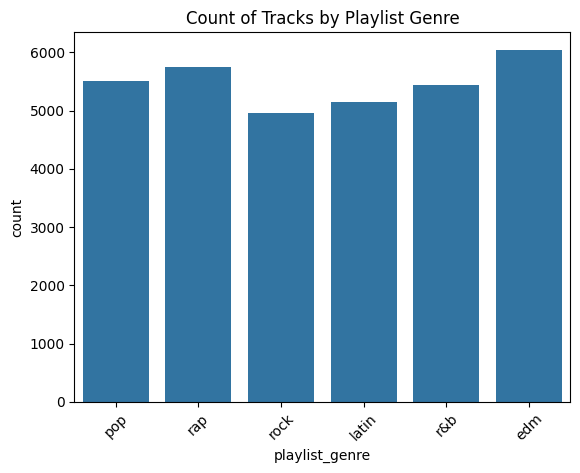

In [12]:
# Count of tracks by playlist genre
sns.countplot(data=df, x='playlist_genre')
plt.title('Count of Tracks by Playlist Genre')
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-62f265c5b636>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=playlist_popularity.values, y=playlist_popularity.index, palette=palette)


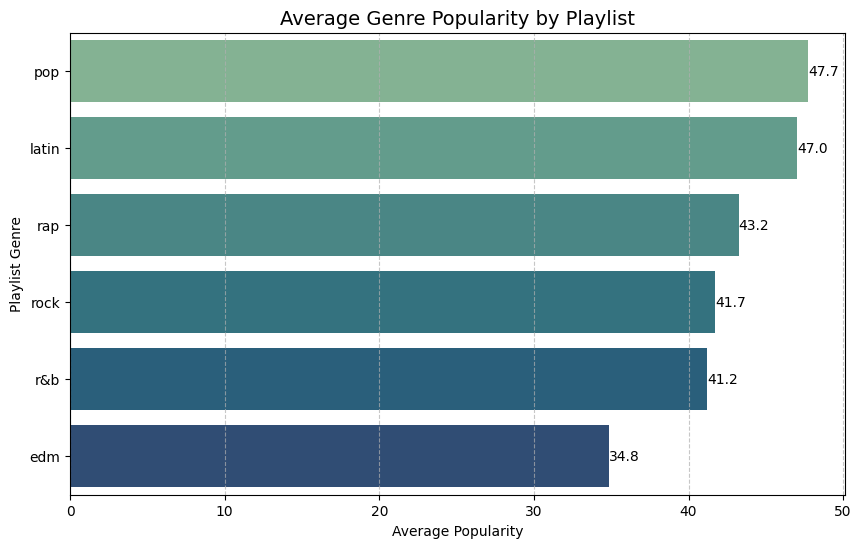

In [15]:
# Average popularity by playlist genre, sorted in descending order
playlist_popularity = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

# Plotting with improvements
plt.figure(figsize=(10, 6))

# Use a green-turquoise gradient palette
palette = sns.color_palette("crest", n_colors=len(playlist_popularity))
sns.barplot(x=playlist_popularity.values, y=playlist_popularity.index, palette=palette)

# Adding data labels
for index, value in enumerate(playlist_popularity.values):
    plt.text(value, index, f'{value:.1f}', va='center', ha='left', color='black')

# Enhancing readability
plt.title('Average Genre Popularity by Playlist', fontsize=14)
plt.xlabel('Average Popularity', fontsize=10)
plt.ylabel('Playlist Genre', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding gridlines for comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


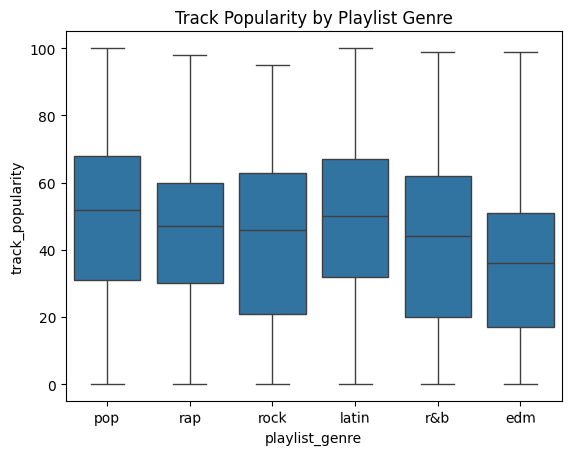

In [24]:
# Boxplot of track popularity by playlist genre
sns.boxplot(data=df, x='playlist_genre', y='track_popularity')
plt.title('Track Popularity by Playlist Genre')
plt.xticks(rotation=1)
plt.show()

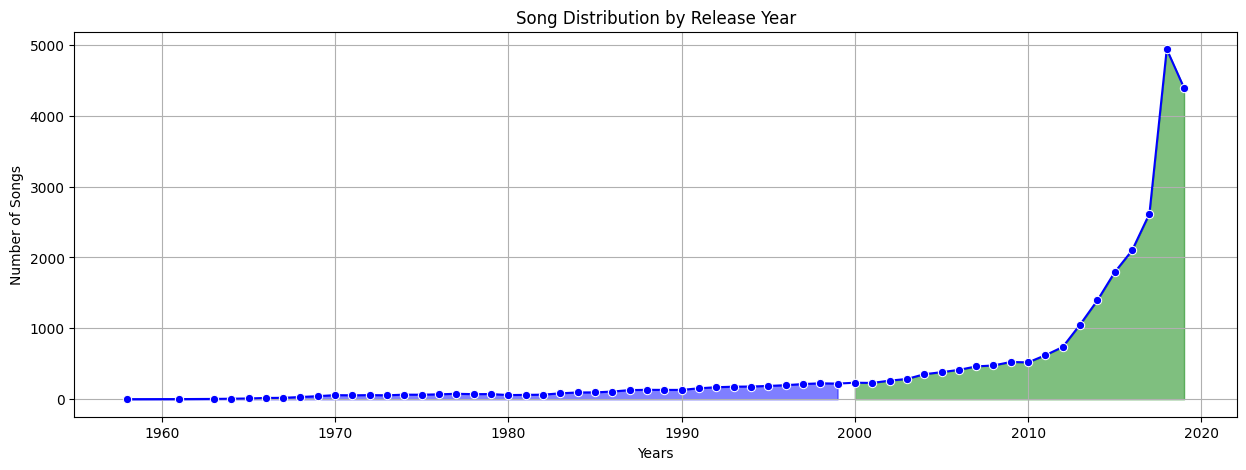

In [22]:
# Assuming your DataFrame is named df and has a 'track_album_release_date' column
df['year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

# Counting the number of songs released each year
yearly_tracks = df['year'].value_counts().sort_index()

# Now, proceed with the rest of your code:
# Removing the most recent year if it's incomplete
yearly_tracks = yearly_tracks[yearly_tracks.index < 2023]  # Adjust the year based on your dataset

# Smoothing the trend with a rolling average
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

# Plotting the smoothed trend with annotations and color coding
plt.figure(figsize=(15, 5))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Song Distribution by Release Year')
plt.xlabel('Years')
plt.ylabel('Number of Songs')
plt.grid(True)

# Adding annotations for key points
max_year = yearly_tracks.idxmax()
max_value = yearly_tracks.max()
plt.annotate(f'Maximum in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value + 500),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

# Color coding different eras
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2000, color='blue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2000, color='green', alpha=0.5)

plt.show()

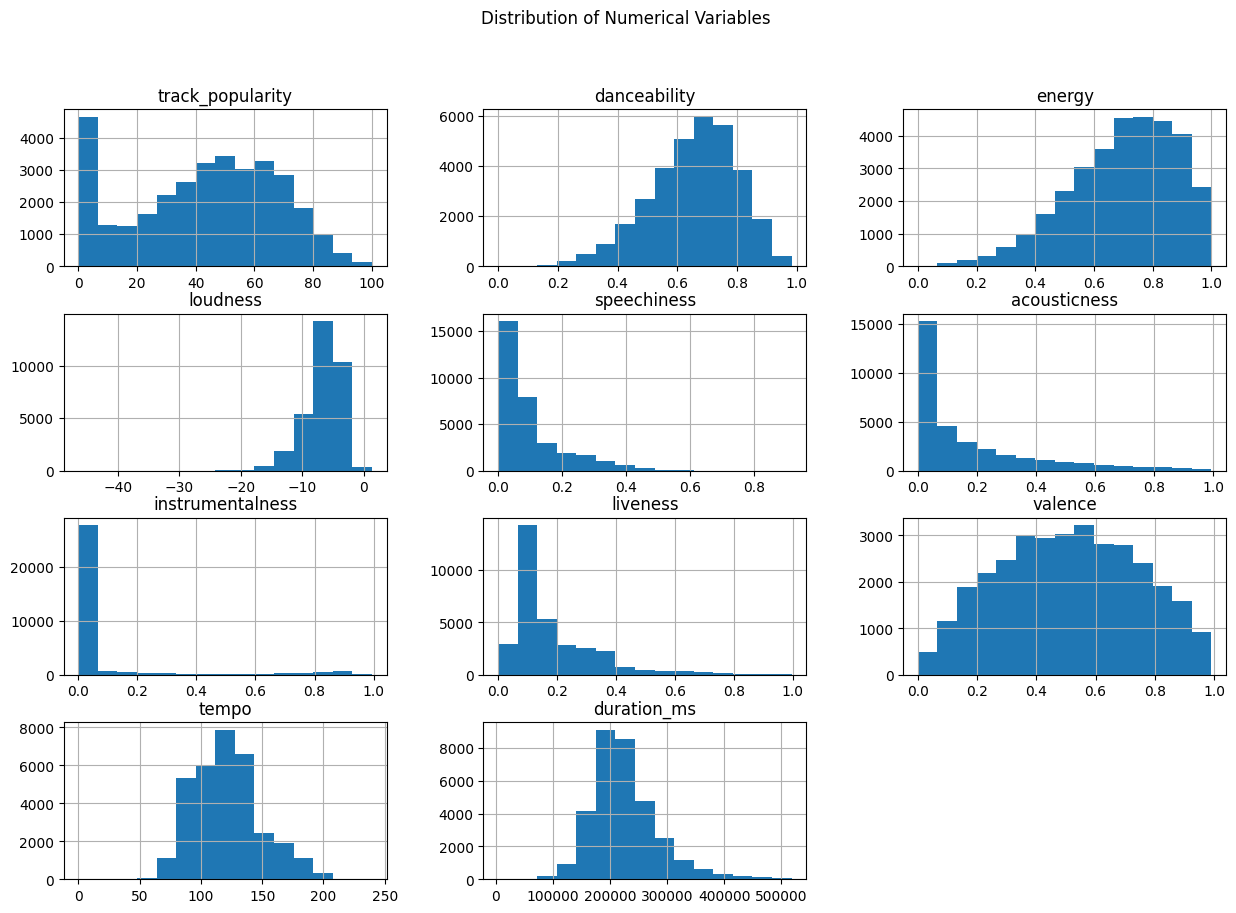


playlist_genre
edm      6043
rap      5743
pop      5507
r&b      5431
latin    5153
rock     4951
Name: count, dtype: int64

track_artist
Martin Garrix                161
Queen                        136
The Chainsmokers             123
David Guetta                 110
Don Omar                     102
Drake                        100
Dimitri Vegas & Like Mike     93
Calvin Harris                 91
Hardwell                      84
Kygo                          83
Name: count, dtype: int64


In [28]:
numerical_columns = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

# Frequency of categorical variables
print()
print(df['playlist_genre'].value_counts())

# Top 10 most frequent artists
print()
print(df['track_artist'].value_counts().head(10))

<ipython-input-41-30b492817d3f>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-41-30b492817d3f>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




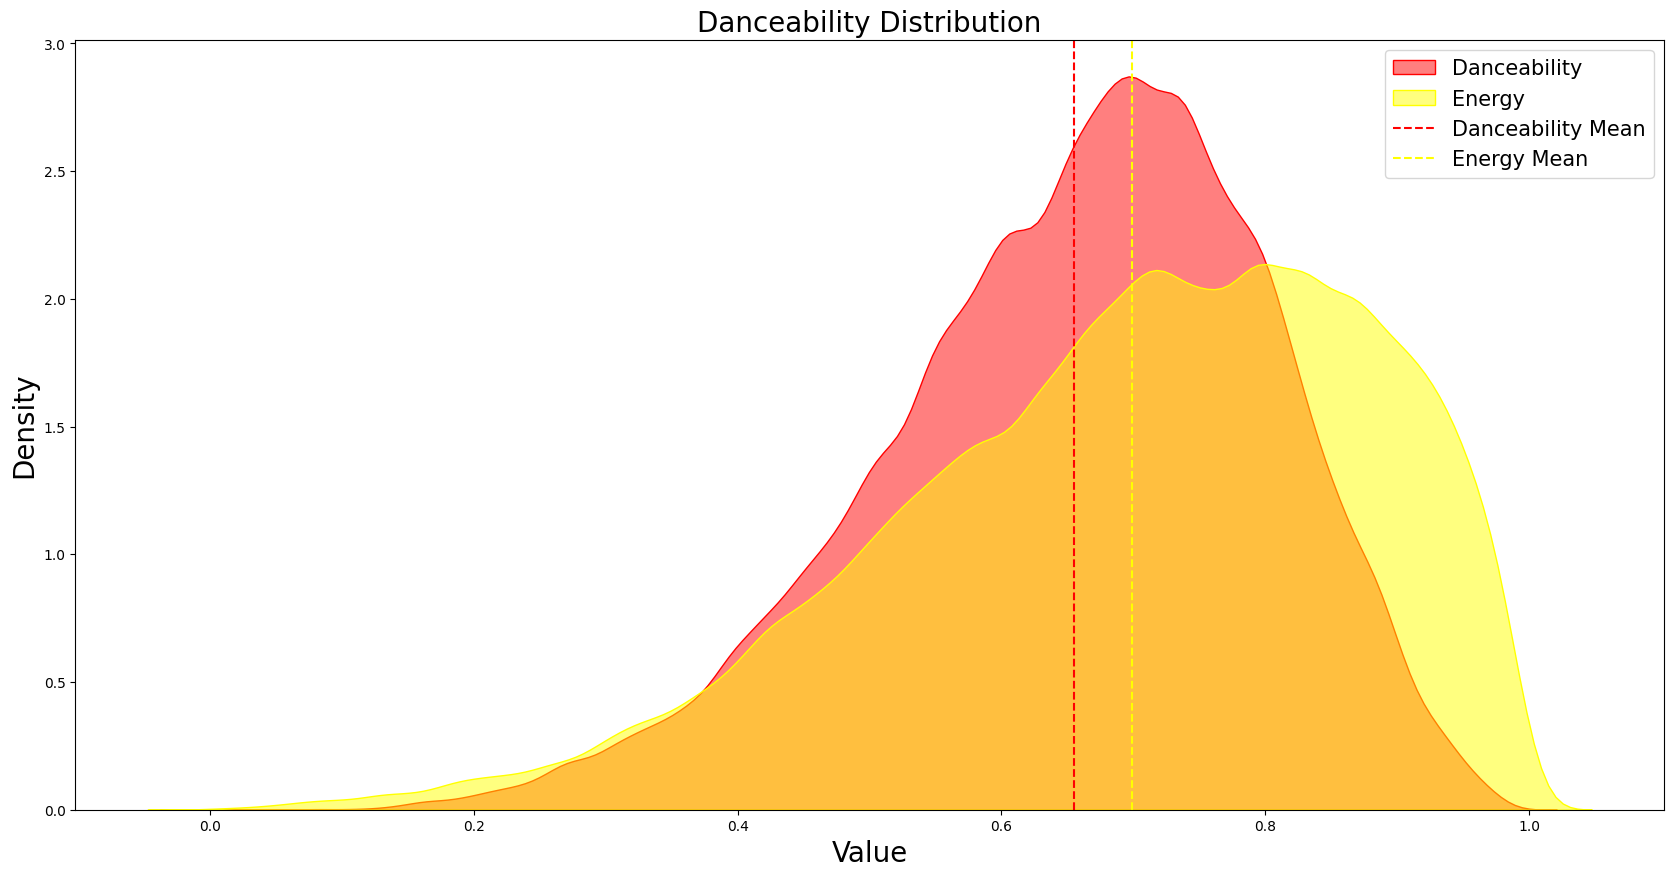

In [41]:
# plot Danceability Distribution
plt.figure(figsize=(20.5, 10))
sns.kdeplot(df['danceability'], shade=True, label='Danceability', color='red', alpha=0.5, bw_adjust=0.7)
sns.kdeplot(df['energy'], shade=True, label='Energy', color='yellow', alpha=0.5, bw_adjust=0.7)
plt.axvline(df['danceability'].mean(), color='red', linestyle='--', label='Danceability Mean')
plt.axvline(df['energy'].mean(), color='yellow', linestyle='--', label='Energy Mean')
plt.title('Danceability Distribution', fontsize=20)
plt.xlabel('Value', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(fontsize=15)
plt.grid(False)
plt.show()

In [29]:
df[['playlist_genre', 'playlist_subgenre']] = df[['playlist_genre', 'playlist_subgenre']] \
                                                  .apply(lambda x: x.str.capitalize(), axis=1)
fig = px.sunburst(df,
                  path=['playlist_genre', 'playlist_subgenre'],
                  color='track_popularity',
                  labels={'track_popularity': 'Popularity'})
fig.show()

In [31]:
fig = px.treemap(df.groupby(['playlist_genre', 'playlist_subgenre']).track_popularity.agg(['count', 'mean']).reset_index(),
                 path=[px.Constant('Playlist Genres'), 'playlist_genre', 'playlist_subgenre'],
                 values='count',
                 color='mean',
                 labels={'mean': 'Popularity'},
                )
fig.show()

In [32]:
plot_df = df.copy()
plot_df.columns = plot_df.columns.str.replace("_", " ").str.title()

fig = px.parallel_coordinates(
    pd.concat([plot_df.select_dtypes(float), plot_df['Track Popularity']], axis=1),
    color="Track Popularity",
    color_continuous_scale=px.colors.diverging.Spectral,
    color_continuous_midpoint=5,
    labels={'Track Popularity': 'Popularity'},
)
fig.update_layout(
    title={
        'text': "Popularity against features",
        'x': 0.5,
        'y': 0.99,
        'xanchor': 'center'
    },
    margin=dict(t=80)
)
fig.show()

Insight :
- A. Valensi sebuah lagu memiliki pengaruh besar terhadap popularitas. Kita dapat melihat bahwa lagu-lagu dengan valensi tinggi, seperti lagu-lagu yang ceria, positif, dan bahagia, memiliki popularitas yang lebih tinggi dibandingkan lagu-lagu dengan valensi rendah.

- B. Lagu-lagu dengan durasi 2-5 menit adalah yang paling optimal dalam hal popularitas.


- C. Lagu-lagu dengan tempo yang lebih tinggi tidak terlalu populer, dan sebaliknya, lagu-lagu dengan tempo sedang hingga rendah memiliki lebih banyak pendengar, yang berarti lebih populer.


- D. Lagu-lagu yang berpotensi populer adalah lagu-lagu yang memiliki suasana yang mengundang pendengar untuk menari.




In [42]:
#Create new dataframe by keeping useful features from the previous one
new_df = df.drop(['track_id', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre'], axis=1)

In [43]:
# Selecting columns for features and target variable
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms']
target = 'playlist_subgenre'

# Creating feature set and target variable
X = new_df[features]
y = new_df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Import library and encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [45]:
# Feature scaling
cols = X.columns
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

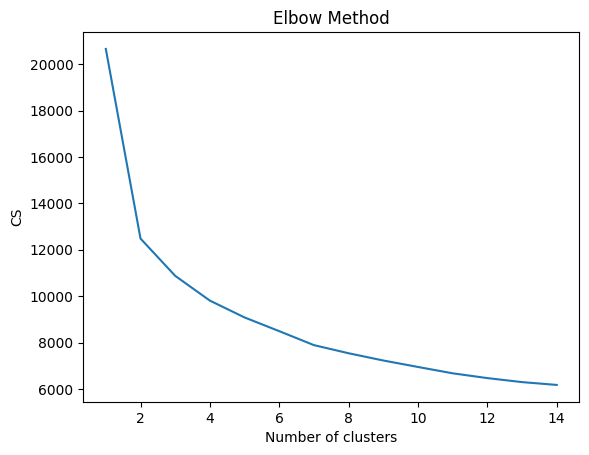

In [47]:
# Use Elbow method to find the optimal number of clusters
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [48]:
# K Means with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [49]:
# Cek akurasi model dengan k=2
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1371 out of 32828 samples were correctly labeled.
Accuracy score: 0.04


In [51]:
#Mencoba klaster lain.
#Penurunan terbesar terjadi sekitar 2 klaster, namun sebelumnya telah ditunjukkan bahwa 2 klaster hanya menghasilkan akurasi sebesar 16%

cluster_num = []
accuracy = []

for i in range (1, 15):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    correct_labels = sum(y == labels)
    cluster_num.append(i)
    accuracy.append(correct_labels/float(y.size))

performance = pd.DataFrame({'cluster_num': cluster_num, 'accuracy': accuracy})

In [53]:
# Menerapkan hasil
kmeans = KMeans(n_clusters=13, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=13, n_init=10, random_state=42)

In [54]:
# Add cluster labels to DataFrame
new_df['cluster'] = kmeans.labels_

# Print the DataFrame with cluster labels
new_df.head()

,track_name,track_artist,track_popularity,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,cluster
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,Dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019.0,4
1,Memories - Dillon Francis Remix,Maroon 5,67,Dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019.0,4
2,All the Time - Don Diablo Remix,Zara Larsson,70,Dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019.0,12
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019.0,5
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019.0,1


In [55]:
new_df[new_df['track_artist'] == 'Ariana Grande'].head()

,track_name,track_artist,track_popularity,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,cluster
370,One Last Time,Ariana Grande,16,Dance pop,0.628,0.593,8,-5.036,1,0.0323,0.0930,0.000002,0.096,0.104,125.026,197267,2014.0,5
1207,Problem,Ariana Grande,9,Dance pop,0.660,0.805,1,-5.352,0,0.1530,0.0192,0.000009,0.159,0.625,103.009,193920,2014.0,12
1335,Bad To You (with Normani & Nicki Minaj),Ariana Grande,76,Post-teen pop,0.727,0.583,7,-7.385,0,0.0718,0.0650,0.000000,0.106,0.629,147.983,171840,2019.0,0
1723,"thank u, next",Ariana Grande,87,Post-teen pop,0.717,0.653,1,-5.634,1,0.0658,0.2290,0.000000,0.101,0.412,106.966,207320,2019.0,7
1733,no tears left to cry,Ariana Grande,83,Post-teen pop,0.699,0.713,9,-5.507,0,0.0594,0.0400,0.000003,0.294,0.354,121.993,205920,2018.0,10


In [56]:
# Track name to find similar songs
track_name = 'Shape of You'

# Filter rows with the same cluster as the given track
similar_songs = new_df[(new_df['track_name'] != track_name) &
                       (new_df['cluster'] == new_df.loc[new_df['track_name'] == track_name, 'cluster'].iloc[0])]

# Show similar songs
similar_songs[['track_name', 'track_artist']].head(10)

,track_name,track_artist
2,All the Time - Don Diablo Remix,Zara Larsson
13,SOS - Laidback Luke Tribute Remix / Radio Edit,Avicii
37,Side Effects - Fedde Le Grand Remix,The Chainsmokers
42,Unlove You,Armin van Buuren
48,American Boy - Brooks Remix,Estelle
59,All Star - Breathe Carolina Remix,Smash Mouth
65,Talk - Disclosure VIP,Khalid
69,Hearts Ain't Gonna Lie - Eden Prince Remix,Arlissa
80,All the Time,Zara Larsson
94,Harder,Jax Jones


# KNN Recommended Songs

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

print("Viewing training x_train", train_data.shape)
print("Viewing test test_data", test_data.shape)

Viewing training x_train (24621, 24)
Viewing test test_data (8207, 24)


In [58]:
interaction_matrix = train_data.pivot_table(index='playlist_id', columns='track_id', values='track_popularity').fillna(0)

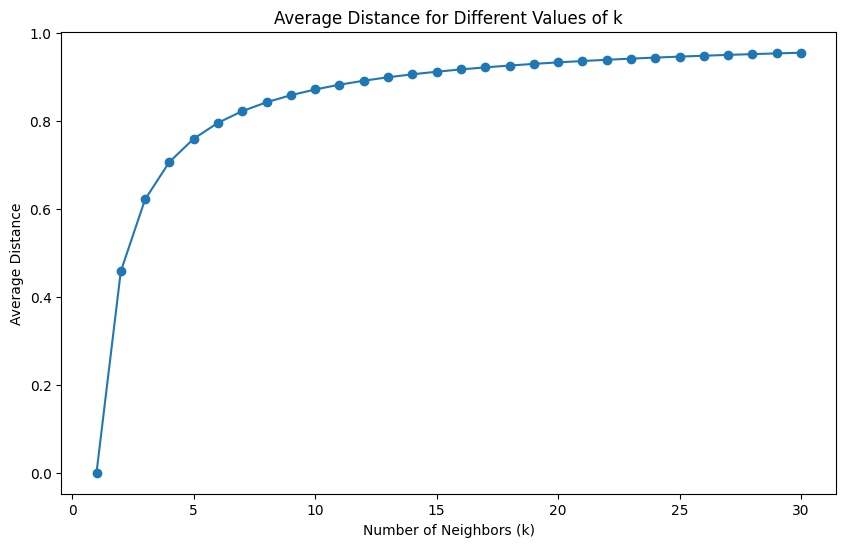

Best value of k: 1


In [59]:
k_values = list(range(1, 31))
mean_distances = []
for k in k_values:
    model = NearestNeighbors(n_neighbors=k, metric='cosine')
    model.fit(interaction_matrix)
    distances, indices = model.kneighbors(interaction_matrix)
    mean_distance = np.mean(distances)
    mean_distances.append(mean_distance)

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_distances, marker='o')
plt.title('Average Distance for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Distance')
plt.grid(False)
plt.show()

best_k = k_values[np.argmin(mean_distances)]
print(f"Best value of k: {best_k}")

In [60]:
model = NearestNeighbors(n_neighbors=best_k, metric='cosine')
model.fit(interaction_matrix)

NearestNeighbors(metric='cosine', n_neighbors=1)

In [61]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

X = df[features]

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler

StandardScaler()

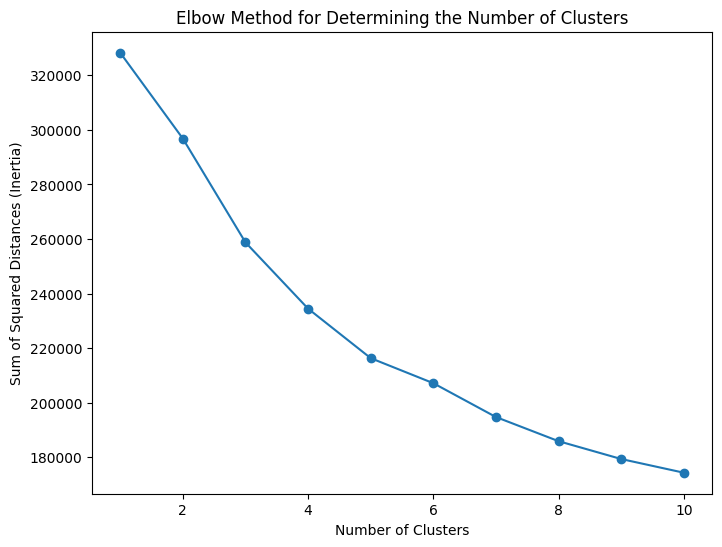

In [63]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Determining the Number of Clusters')
plt.grid(False)
plt.show()

In [64]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)
kmeans

KMeans(n_clusters=4, random_state=42)

In [65]:
def recommend_songs_by_cluster_kmeans(song_name, data):
    selected_song = data[data['track_name'].str.contains(song_name, case=False, na=False)]
    if selected_song.empty:
        print("Song not found.")
        return None
    cluster = selected_song['cluster_kmeans'].values[0]
    recommended_songs = data[data['cluster_kmeans'] == cluster]
    recommended_songs = recommended_songs[recommended_songs['track_name'] != selected_song['track_name'].values[0]]
    return recommended_songs[['track_name', 'track_artist']].head(30)

In [66]:
song_name = "The Dance of Eternity"
top_recommendations_kmeans = recommend_songs_by_cluster_kmeans(song_name, df)
if top_recommendations_kmeans is not None:
    print("Recommended music")
    print(top_recommendations_kmeans)

Recommended music
                                     track_name               track_artist
45    Heaven Can Wait - The Aston Shuffle Remix                        Sia
169                      With You - LöKii Remix                    Kaskade
202            Dreams Of You (feat. Rae Morris)                     Icarus
342                                       Penny   Dimitri Vangelis & Wyman
350             Shades Of Voices (Original Mix)                     PULLER
353                           Spirit Of Freedom                    Dropgun
361                                     Skyline                     Catiso
362                      Callin' - Extended Mix               Lush & Simon
368                                     Mercury                     Catiso
376                                   Pure Gold                     oomiee
502                                    Sunshine               David Guetta
513                                    Whispers                      ELYAZ
529    